In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [329]:
path ='/Users/Rajarshi/income_tr.csv'
# raw_data always contains the entire dataset
raw_data = pd.read_csv(path)
# data contains the processed dataset
data = pd.read_csv(path)

In [55]:
raw_data.head()

,ID,age,workclass,fnlwgt,education,education_cat,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hour_per_week,native_country,class
0,9364,38,Private,197077,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
1,25668,31,Private,101761,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,51,United-States,<=50K
2,13316,26,Private,152855,HS-grad,9,Never-married,Exec-managerial,Own-child,Other,Female,0,0,40,Mexico,<=50K
3,28750,50,Self-emp-not-inc,99894,5th-6th,3,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0,0,15,United-States,<=50K
4,30619,35,Private,412379,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


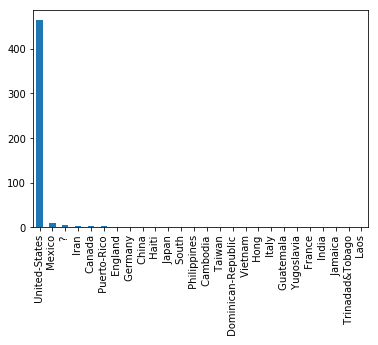

In [332]:

data.native_country.value_counts().plot(kind="bar")


In [56]:
# clean the data
# Same number of columns has ? so just remove those to overcome any adverse affect of outliers
data = data[(data['workclass'] != ' ?') & (data['occupation'] != ' ?')]

In [326]:
data.capital_gain.describe()

count      492.000000
mean      1085.599593
std       6979.369258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [57]:
# a function similar to make_df_simple, but with one more column
def make_df(df, feature):
    df_less50K = df.loc[df['income>50K']==0, feature].value_counts().sort_index()
    df_more50K = df.loc[df['income>50K']==1, feature].value_counts().sort_index()
    df_sep = pd.concat([df_less50K, df_more50K], axis=1)
    df_sep.columns = ['<50K', '>50K']
    df_sep = df_sep.fillna(value=0)
    df_sep['total'] = df_sep.sum(axis=1)
    df_sep['percent of >50K'] = (df_sep['>50K'] / df_sep['total']) *100
    df_sep.sort_values(by=['percent of >50K'], ascending=False, inplace=True)
    return df_sep

In [58]:
# renmae the data class column name
data = data.rename(columns={"class": "income"})
data.income.value_counts()

 <=50K    397
 >50K      95
Name: income, dtype: int64

In [59]:
# Create column to show income classification
data['income>50K'] = np.where(data.income == ' <=50K', 0, 1) 
data['income>50K'].value_counts()

0    397
1     95
Name: income>50K, dtype: int64

In [60]:
#################################################################################

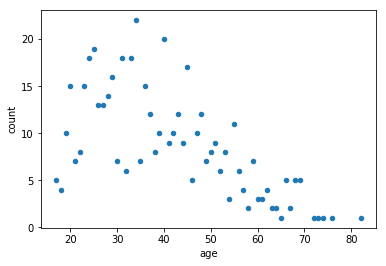

In [61]:
# Analysis of age with income
data.age.value_counts()
# Group the ages by the total number
df = data.age.value_counts().to_frame()
# A little bit adjustments
df['count'] = df.age
df['age'] = df.index
# plot the age distribution 
df.plot(kind='scatter', x='age', y='count')

In [62]:
# Group the ages depending on their income
s_age = make_df(data,"age")
s_age['age'] = s_age.index

# make classification
bins = [0, 30, 50, 100]
group_names = [1, 2, 3]
s_age['age_category'] = pd.cut(s_age['age'], bins, labels=group_names)
df_age = s_age # Catagorized data frame by age
df_age.sort_values(by=['age_category'], ascending=False, inplace=True)
# Make three groups based on the age
df_aged_3 = df_age[df_age['age_category'] ==3]
df_aged_2 = df_age[df_age['age_category'] ==2]
df_aged_1 = df_age[df_age['age_category'] ==1]
# Finally make another dataset
df_age_dict = { '<50K' : [sum(df_aged_1['<50K']), sum(df_aged_2['<50K']), sum(df_aged_3['<50K'])],
       '>50K' : [sum(df_aged_1['>50K']), sum(df_aged_2['>50K']), sum(df_aged_3['>50K'])],
       'total' : [sum(df_aged_1['total']), sum(df_aged_2['total']), sum(df_aged_3['total'])], 
     }
df_age = pd.DataFrame.from_dict(df_age_dict)
df_age['percent of >50K'] = (df_age['>50K'] / df_age['total']) *100
df_age

,<50K,>50K,total,percent of >50K
0,156.0,8.0,164.0,4.878049
1,172.0,63.0,235.0,26.808511
2,69.0,24.0,93.0,25.806452


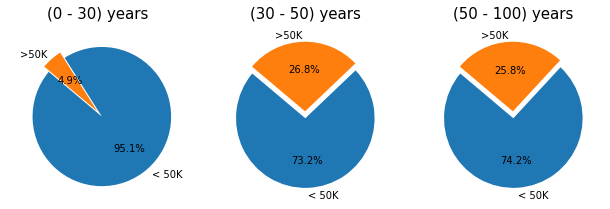

In [63]:
# Plot the age income distribtion
plt.figure(figsize=(18, 3.2))
for i in range(3):
    labels = "< 50K", ">50K"
    explode = (0.1, 0)
    toPie = [df_age.iloc[i, 0], df_age.iloc[i, 1]]
    plt.subplot(1, 5, i+1)
    plt.pie(toPie, explode=explode, labels=labels, #colors=['#bb0000', '#666666'],
        autopct='%1.1f%%', shadow=False, startangle=140);
    if i == 0:
        plt.title("(0 - 30) years", fontsize=15)
    elif i == 1:
        plt.title('(30 - 50) years', fontsize=15)
    elif i == 2:
        plt.title('(50 - 100) years', fontsize=15)
    

In [64]:
########################################################################################

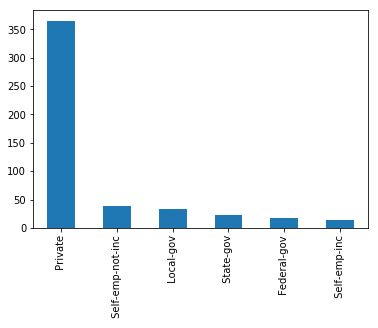

In [65]:
data.workclass.value_counts().plot(kind = "bar")

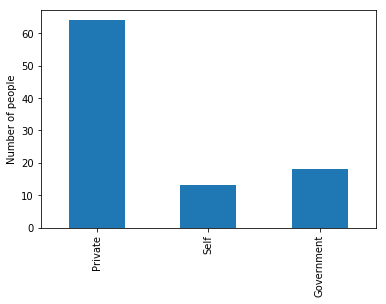

In [66]:
# Distribution corresponding to the workclass
data_work_class = make_df(data, 'workclass')
data_work_class
data_work_class["workclass"] = data_work_class.index

data_work_class.loc[data_work_class['workclass'].str.contains("Private"), 'workclass_cat'] = 1
data_work_class.loc[data_work_class['workclass'].str.contains("Self"), 'workclass_cat'] = 2
data_work_class.loc[data_work_class['workclass'].str.contains("gov"), 'workclass_cat'] = 3
data_work_class['workclass'] = data_work_class['workclass_cat']
data_work_class.drop('workclass_cat', axis=1, inplace=True)
data_work_class.workclass = data_work_class.workclass.astype(int)

df_work_class = data_work_class
# Make three groups based on the workclass
df_work_3 = df_work_class.loc[df_work_class['workclass'] ==3]
df_work_2 = df_work_class.loc[df_work_class['workclass'] ==2]
df_work_1 = df_work_class.loc[df_work_class['workclass'] ==1]
# Finally make another dataset
df_work_dict = { '<50K' : [sum(df_work_1['<50K']), sum(df_work_2['<50K']), sum(df_work_3['<50K'])],
       '>50K' : [sum(df_work_1['>50K']), sum(df_work_2['>50K']), sum(df_work_3['>50K'])],
       'total' : [sum(df_work_1['total']), sum(df_work_2['total']), sum(df_work_3['total'])], 
     }
df_work = pd.DataFrame.from_dict(df_work_dict)
df_work['percent of >50K'] = (df_work['>50K'] / df_work['total']) *100
wc = ['Private', 'Self', 'Government']
df_work.index = wc
df_work
plt.figure()
df_work['>50K'].plot(kind='bar')
plt.ylabel("Number of people")


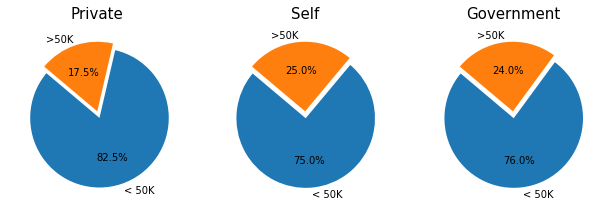

In [67]:
# Plot the Workgroup income distribtion
plt.figure(figsize=(18, 3.2))
for i in range(3):
    labels = "< 50K", ">50K"
    explode = (0.1, 0)
    toPie = [df_work.iloc[i, 0], df_work.iloc[i, 1]]
    plt.subplot(1, 5, i+1)
    plt.pie(toPie, explode=explode, labels=labels, #colors=['#bb0000', '#666666'],
        autopct='%1.1f%%', shadow=False, startangle=140);
    if i == 0:
        plt.title("Private", fontsize=15)
    elif i == 1:
        plt.title('Self', fontsize=15)
    elif i == 2:
        plt.title('Government', fontsize=15)


In [68]:
############################################################################################

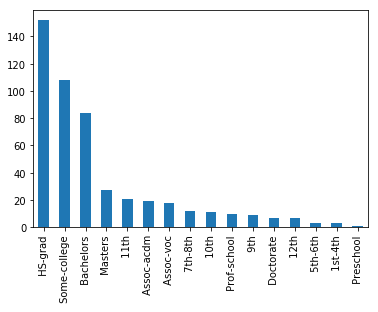

In [281]:
# Distribution corresponding to Edudation
df_ed = make_df(data, 'education')
df_ed
data.education.value_counts().plot(kind="bar")

In [284]:
data.education.unique()

array([' HS-grad', ' 5th-6th', ' Some-college', ' Assoc-voc', ' Bachelors',
       ' 12th', ' Masters', ' 7th-8th', ' Assoc-acdm', ' 10th', ' 9th',
       ' 11th', ' Prof-school', ' Doctorate', ' 1st-4th', ' Preschool'], dtype=object)

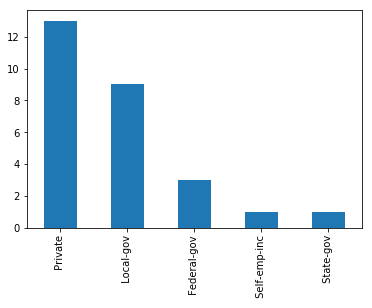

In [299]:
doc = data[data.education == " Doctorate"]
prof = data[data.education == " Prof-school"]
mast = data[data.education == " Masters"]
bach = data[data.education == " Bachelors"]
plt.figure()
mast.workclass.value_counts().plot(kind="bar")

In [282]:
df_ed_temp = df_ed.loc[' Assoc-voc':' Preschool', :].copy()
df_ed_temp2 = df_ed.loc[' Doctorate':' Bachelors', :].copy()
df_ed_new = pd.concat([df_ed_temp2.T, df_ed_temp.sum(axis=0)], axis=1)
df_ed_new.columns = ['Doctorate', 'Prof-school', 'Masters', 'Bachelors', 'Other']
df_ed_new = df_ed_new.T
df_ed_new['percent of >50K'] = (df_ed_new['>50K'] / (df_ed_new['<50K'] + df_ed_new['>50K']))*100
df_ed_new

,<50K,>50K,total,percent of >50K
Doctorate,1.0,6.0,7.0,85.714286
Prof-school,4.0,6.0,10.0,60.000000
Masters,11.0,16.0,27.0,59.259259
Bachelors,56.0,28.0,84.0,33.333333
Other,325.0,39.0,364.0,10.714286


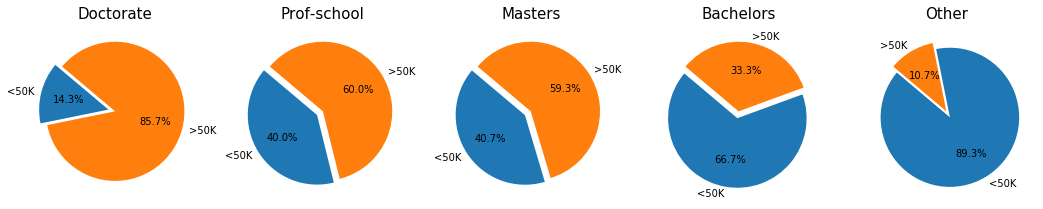

In [283]:
plt.figure(figsize=(18, 3.2))
for i in range(5):
    labels = "<50K", ">50K"
    explode = (0.1, 0)
    toPie = [df_ed_new.iloc[i, 0], df_ed_new.iloc[i, 1]]
    plt.subplot(1, 5, i+1)
    plt.pie(toPie, explode=explode, labels=labels, #colors=['#bb0000', '#666666'],
        autopct='%1.1f%%', shadow=False, startangle=140);
    plt.title(df_ed_new.index[i], fontsize=15)

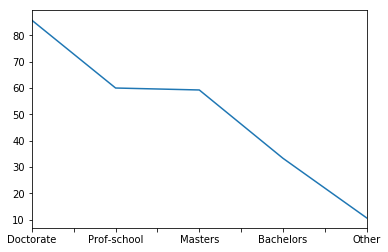

In [72]:
df_ed_new["percent of >50K"].plot()

In [73]:
###########################################################################################

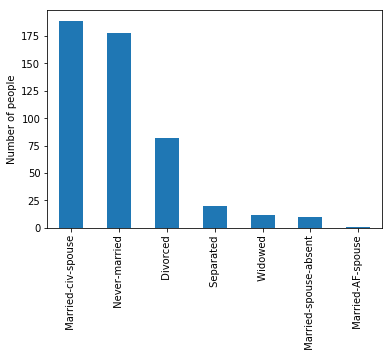

In [220]:
#Analysis of data corresponding to marital status
plt.figure()
data['marital_status'].value_counts().plot(kind="bar")
plt.ylabel("Number of people")

In [221]:
data['marital_status'].unique()

array([' Married-civ-spouse', ' Never-married', ' Widowed', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse'], dtype=object)

([<matplotlib.axis.XTick at 0x113982350>,
 <a list of 4 Text xticklabel objects>)

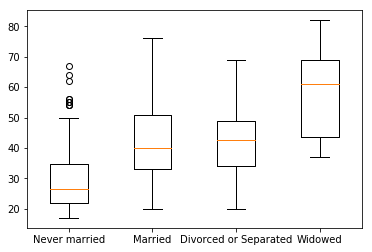

In [279]:
m_d = data
mar = m_d[(m_d['marital_status'] == " Married-civ-spouse") | (m_d['marital_status'] == " Married-spouse-absent") | (m_d['marital_status'] == " Married-AF-spouse")]
wid = m_d[(m_d['marital_status'] == " Widowed")]
div = m_d[(m_d['marital_status'] == " Divorced") | (m_d['marital_status'] == " Separated")]
nev_mar = m_d[(m_d['marital_status'] == " Never-married")]

#mar.age.plot(kind="box")
#div.age.plot(kind="box")
#nev_mar.age.plot(kind="box")

df = pd.DataFrame(columns=['Never married', 'Married', 'Divorced or Separated', 'Widowed'])
df['Never married'] = nev_mar.age
df['Married'] = mar.age
#df['Divorced or Separated']= div.age
#df[.'Widowed'] = wid.age
#df.plot(kind='box')
d = [[nev_mar.age],[mar.age],[div.age],[wid.age]]
plt.figure()
plt.boxplot(d)
plt.xticks([1, 2, 3, 4], ['Never married', 'Married', 'Divorced or Separated', 'Widowed'])

In [75]:
#Analysis of data corresponding to marital status
df_mar = make_df(data, "marital_status")
df_mar['marital_status'] = df_mar.index
df_mar.loc[df_mar['marital_status'].str.contains(" Married"), 'marital_status_cat'] = 1
df_mar.loc[[not d for d in df_mar['marital_status'].str.contains(" Married")], 'marital_status_cat'] = 2
df_mar['marital_status'] = df_mar['marital_status_cat']
df_mar.drop('marital_status_cat', axis=1, inplace=True)
df_mar

,<50K,>50K,total,percent of >50K,marital_status
Married-AF-spouse,0.0,1,1.0,100.000000,1.0
Married-civ-spouse,117.0,72,189.0,38.095238,1.0
Divorced,73.0,9,82.0,10.975610,2.0
Married-spouse-absent,9.0,1,10.0,10.000000,1.0
Separated,18.0,2,20.0,10.000000,2.0
Widowed,11.0,1,12.0,8.333333,2.0
Never-married,169.0,9,178.0,5.056180,2.0


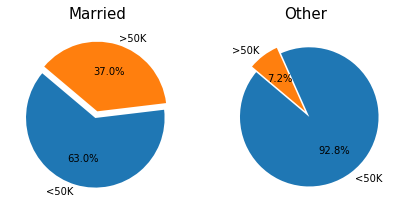

In [76]:
df_married = df_mar.loc[df_mar['marital_status'] == 1]
df_never_mar = df_mar.loc[df_mar['marital_status'] == 2]

df_mar_dict = { '<50K' : [sum(df_married['<50K']), sum(df_never_mar['<50K'])],
       '>50K' : [sum(df_married['>50K']), sum(df_never_mar['>50K'])],
       'total' : [sum(df_married['total']), sum(df_never_mar['total'])], 
     }

df_mar_c = pd.DataFrame.from_dict(df_mar_dict)
df_mar_c['percent of >50K'] = (df_mar_c['>50K'] / df_mar_c['total']) *100

plt.figure(figsize=(18, 3.2))
for i in range(2):
    labels = "<50K", ">50K"
    explode = (0.1, 0)
    toPie = [df_mar_c.iloc[i, 0], df_mar_c.iloc[i, 1]]
    plt.subplot(1, 5, i+1)
    plt.pie(toPie, explode=explode, labels=labels, #colors=['#bb0000', '#666666'],
        autopct='%1.1f%%', shadow=False, startangle=140);
    if i == 0:
        plt.title("Married", fontsize=15)
    elif i == 1:
        plt.title("Other", fontsize=15)

In [77]:
############################################################################################

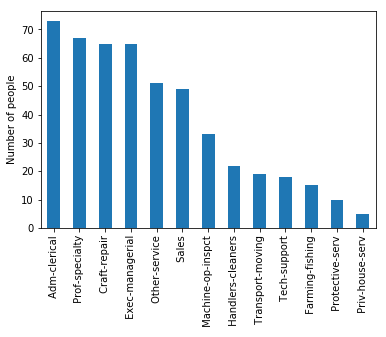

In [78]:
# Analysis based on the occupation
plt.figure()
data['occupation'].value_counts().plot(kind="bar")
plt.ylabel("Number of people")

In [79]:
df_occu = make_df(data, 'occupation')
df_occu


,<50K,>50K,total,percent of >50K
Prof-specialty,39,28.0,67.0,41.791045
Exec-managerial,38,27.0,65.0,41.538462
Farming-fishing,11,4.0,15.0,26.666667
Sales,40,9.0,49.0,18.367347
Craft-repair,55,10.0,65.0,15.384615
Tech-support,16,2.0,18.0,11.111111
Adm-clerical,65,8.0,73.0,10.958904
Protective-serv,9,1.0,10.0,10.000000
Handlers-cleaners,20,2.0,22.0,9.090909
Machine-op-inspct,30,3.0,33.0,9.090909


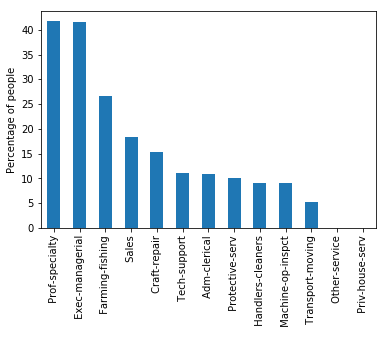

In [80]:
plt.figure()
df_occu['percent of >50K'].plot(kind='bar')
plt.ylabel("Percentage of people")
#plt.title ("Percentage of people that earns more than 50K in different occupation")

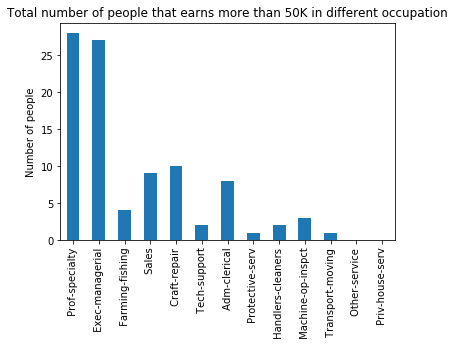

In [81]:
plt.figure()
df_occu['>50K'].plot(kind='bar')
plt.ylabel("Number of people")
plt.title ("Total number of people that earns more than 50K in different occupation")

In [82]:
# Catagorize the occupation
data['occup_catagory'] = data.occupation.map ({' Other-service' : 0, ' Craft-repair' : 1, ' Exec-managerial' :2,
       ' Tech-support' : 3, ' Sales': 4, ' Machine-op-inspct': 5, ' Prof-specialty' : 6,
       ' Handlers-cleaners' : 7, ' ?': 8, ' Transport-moving' : 9, ' Adm-clerical' : 10,
       ' Protective-serv' : 11, ' Priv-house-serv': 12, ' Farming-fishing':13})

In [83]:
# Catagorize the occupation
data['occup_catagory'] = data.occupation.map ({' Other-service' : 0, ' Craft-repair' : 0, ' Exec-managerial' :2,
       ' Tech-support' : 0, ' Sales': 0, ' Machine-op-inspct': 0, ' Prof-specialty' : 6,
       ' Handlers-cleaners' : 0, ' ?': 0, ' Transport-moving' : 0, ' Adm-clerical' : 0,
       ' Protective-serv' : 0, ' Priv-house-serv': 0, ' Farming-fishing':0})

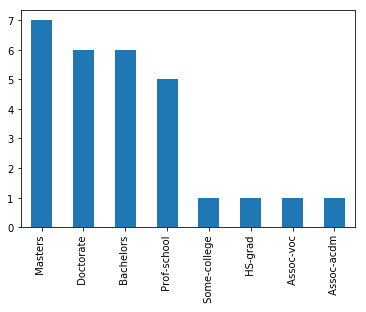

In [84]:
# Filter the occupation "prof-speciality" amd income more than 50k
temp = data[data['occup_catagory'] == 6]
temp = temp[temp['income>50K'] == 1]

#temp.age.describe()
temp.education.value_counts().plot(kind = 'bar') # Polits the different education 
#temp
# Worth noticing that All the doctorates that earns more than 50 K are doing this job
#t = temp[temp['education']== ' Bachelors'].age
#temp.age.describe()
#temp
#temp.workclass.value_counts()
#temp.age.describe()

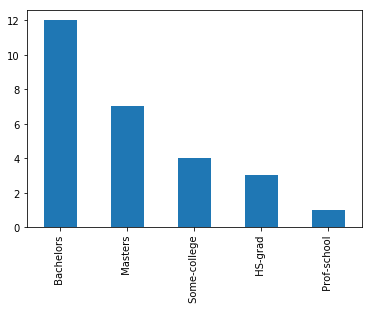

In [85]:
# Filter the occupation "Exec" amd income more than 50k
temp = data[data['occup_catagory'] == 2]
temp = temp[temp['income>50K'] == 1]

#temp.age.describe()
temp.education.value_counts().plot(kind = 'bar') # Polits the different education 
#temp
# Worth noticing that All the doctorates that earns more than 50 K are doing this job
#t = temp[temp['education']== ' Bachelors'].age
#temp.age.describe()



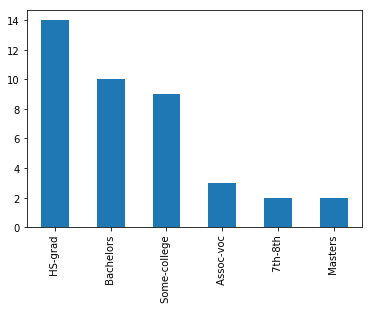

In [86]:
# Filter the occupation of other catagory 
temp = data[data['occup_catagory'] == 0]
temp = temp[temp['income>50K'] == 1]

#temp.age.describe()
temp.education.value_counts().plot(kind = 'bar') # Polits the different education 
#temp.count()
# Worth noticing that All the doctorates that earns more than 50 K are doing this job
#t = temp[temp['education']== ' Bachelors'].age
#temp.age.describe()
#temp = temp[temp['education'] == ' HS-grad']
#temp.age.describe()

In [87]:
###########################################################################################\

In [88]:
# Relationship with relationship 
# Ask this to prof
df_rel = make_df(data, "relationship")
df_rel

,<50K,>50K,total,percent of >50K
Wife,14,11.0,25.0,44.000000
Husband,101,61.0,162.0,37.654321
Not-in-family,126,16.0,142.0,11.267606
Unmarried,66,5.0,71.0,7.042254
Own-child,80,2.0,82.0,2.439024
Other-relative,10,0.0,10.0,0.000000


In [89]:
#############################################################################################

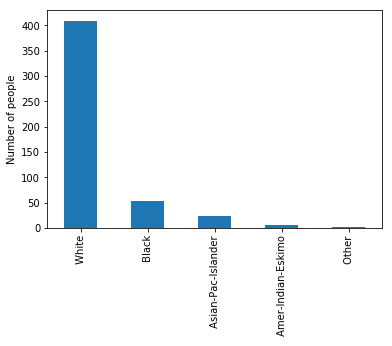

In [90]:
# relation with race
df_race = make_df(data, "race")
df_race["race"] = df_race.index
df_race
#df_race["percent of >50K"].plot(kind="bar")
data.race.value_counts().plot(kind="bar")
plt.ylabel("Number of people")

In [91]:
df_race.loc[df_race['race'].str.contains(" White"), 'race_cat'] = 1
df_race.loc[[not d for d in df_race['race'].str.contains(" White")], 'race_cat'] = 2
df_race['race'] = df_race['race_cat']
df_race.drop('race_cat', axis=1, inplace=True)
df_race

df_race_white = df_race.loc[df_race['race'] == 1]
df_race_other = df_race.loc[df_race['race'] == 2]

df_dict = { '<50K' : [sum(df_race_white['<50K']), sum(df_race_other['<50K'])],
       '>50K' : [sum(df_race_white['>50K']), sum(df_race_other['>50K'])],
       'total' : [sum(df_race_white['total']), sum(df_race_other['total'])], 
     }

df_race = pd.DataFrame.from_dict(df_dict)
df_race['percent of >50K'] = (df_race['>50K'] / df_race['total']) *100

df_race

,<50K,>50K,total,percent of >50K
0,326,83.0,409.0,20.293399
1,71,12.0,83.0,14.457831


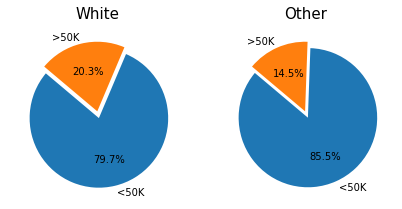

In [92]:
plt.figure(figsize=(18, 3.2))
for i in range(2):
    labels = "<50K", ">50K"
    explode = (0.1, 0)
    toPie = [df_race.iloc[i, 0], df_race.iloc[i, 1]]
    plt.subplot(1, 5, i+1)
    plt.pie(toPie, explode=explode, labels=labels, #colors=['#bb0000', '#666666'],
        autopct='%1.1f%%', shadow=False, startangle=140);
    if i == 0:
        plt.title("White", fontsize=15)
    elif i == 1:
        plt.title("Other", fontsize=15)

In [93]:
##############################################################################

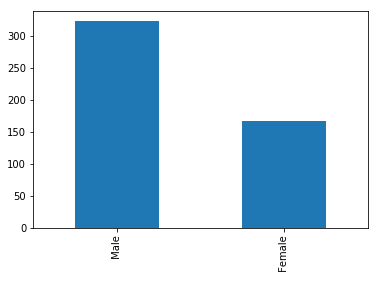

In [318]:

#Correspinding to gender
df_gen = make_df(data, "gender")
d_m = data[data.gender ==" Male"]
d_f = data[data.gender ==" Female"]

d = [d_m.gender.value_counts(),d_f.gender.value_counts()]
     
data.gender.value_counts().plot(kind="bar")
#plt.xticks([1, 2, 3, 4], ['Never married', 'Married', 'Divorced or Separated', 'Widowed'])
#df_gen
#df_gen["percent of >50K"].plot(kind="pie")

In [95]:
########################################################################################
##Capital gain 

In [96]:
########################################################################################

In [97]:
########################################################################################

In [98]:
########################################################################################

0      1.0
1      1.0
2      2.0
3      1.0
4      1.0
5      1.0
6      2.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     2.0
18     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     2.0
30     1.0
      ... 
490    1.0
491    1.0
492    1.0
493    1.0
494    1.0
495    1.0
496    1.0
497    1.0
498    1.0
499    1.0
500    2.0
501    1.0
502    1.0
503    1.0
504    2.0
505    1.0
506    1.0
507    1.0
508    1.0
509    1.0
510    1.0
511    1.0
512    1.0
513    1.0
514    1.0
515    2.0
516    2.0
517    1.0
518    1.0
519    1.0
Name: native_country, dtype: float64

In [99]:
# native country 
df_c = make_df(data, "native_country")
df_c["native_country"] = df_c.index
df_c.loc[df_c['native_country'].str.contains(" United-States"), 'native_country_cat'] = 1
df_c.loc[[not d for d in df_c['native_country'].str.contains(" United-States")], 'native_country_cat'] = 2
df_c['native_country'] = df_c['native_country_cat']
df_c.drop('native_country_cat', axis=1, inplace=True)
df_c

df_us = df_c.loc[df_c['native_country'] == 1]
df_non_us = df_c.loc[df_c['native_country'] == 2]

df_dict = { '<50K' : [sum(df_us['<50K']), sum(df_non_us['<50K'])],
       '>50K' : [sum(df_us['>50K']), sum(df_non_us['>50K'])],
       'total' : [sum(df_us['total']), sum(df_non_us['total'])], 
     }

df_c = pd.DataFrame.from_dict(df_dict)
df_c['percent of >50K'] = (df_c['>50K'] / df_c['total']) *100
df_c

,<50K,>50K,total,percent of >50K
0,355.0,83.0,438.0,18.949772
1,42.0,12.0,54.0,22.222222


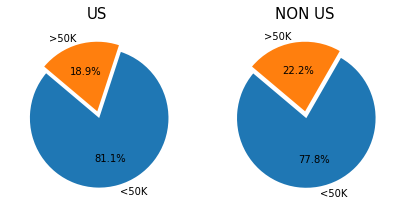

In [102]:
plt.figure(figsize=(18, 3.2))
for i in range(2):
    labels = "<50K", ">50K"
    explode = (0.1, 0)
    toPie = [df_c.iloc[i, 0], df_c.iloc[i, 1]]
    plt.subplot(1, 5, i+1)
    plt.pie(toPie, explode=explode, labels=labels, #colors=['#bb0000', '#666666'],
        autopct='%1.1f%%', shadow=False, startangle=140);
    if i == 0:
        plt.title("US", fontsize=15)
    elif i == 1:
        plt.title("NON US", fontsize=15)

In [103]:
df_c = data
df_c.loc[df_c['native_country'].str.contains(" United-States"), 'native_country_cat'] = 1
df_c.loc[[not d for d in df_c['native_country'].str.contains(" United-States")], 'native_country_cat'] = 2
df_c['native_country'] = df_c['native_country_cat']
df_c.drop('native_country_cat', axis=1, inplace=True)



In [104]:
# Education in US
df_edu_us = df_c[df_c.native_country == 1] # only US data both class
df_edu_us = df_edu_us[df_edu_us['income>50K'] == 1]  # earns more than 50K
df_count = df_edu_us.education.value_counts()
d = df_count[' Bachelors'] 
h_edu =  df_count[' Bachelors'] + df_count[' Masters'] + df_count[' Doctorate']
other_edu = sum(df_count) - h_edu
# Education distribution who earns more than 50K
df_edu_dict = { 'Higher Educated' : h_edu,
                 'Others' : other_edu}
df_edu_dict

{'Higher Educated': 43, 'Others': 40}

In [105]:
df_count.index

Index([u' Bachelors', u' HS-grad', u' Masters', u' Some-college',
       u' Prof-school', u' Doctorate', u' Assoc-voc', u' 7th-8th',
       u' Assoc-acdm'],
      dtype='object')

In [106]:
# Education in non US country
df_edu_non_us = df_c[df_c.native_country == 2]
da = df_edu_non_us
df_edu_non_us = df_edu_non_us[df_edu_non_us['income>50K'] == 1] # who earns more
df_count = df_edu_non_us.education.value_counts()
#df_edu_non_us.plot(kind='pie')
df_count = df_edu_non_us.education.value_counts()
d = df_count[' Bachelors'] 
h_edu =  df_count[' Bachelors'] + df_count[' Masters'] + df_count[' Doctorate']
other_edu = sum(df_count) - h_edu
# Education distribution who earns more than 50K
df_edu_dict = { 'Higher Educated' : h_edu,
                 'Others' : other_edu}
df_edu_dict

{'Higher Educated': 7, 'Others': 5}

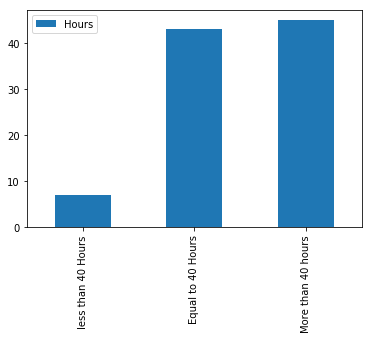

In [196]:
# Analysis of hours per week with income
data["hour_per_week"].value_counts()
# Group the hours by the total number
df = data["hour_per_week"].value_counts().to_frame()
df
# A little bit adjustments
df['Number of people'] = df['hour_per_week']
df['hours'] = df.index
df
# plot the age distribution 
#df.plot(kind='scatter', x='hours', y='Number of people')
r1 = data[data["hour_per_week"] < 40]#.education.value_counts()
r2 = data[data["hour_per_week"] == 40]
r3 = data[data["hour_per_week"] > 40]#.education.value_counts()

#r1[r1["income>50K"] == 1].count()
#r2[r2["income>50K"] == 1].count()
#r3[r3["income>50K"] == 1].count()
#r1.plot(kind="pie", fontsize="8")

dict_h =  {
            "Hours" : [7,43,45]
           }

dict_h
df = pd.DataFrame({'number of people': 7}, index=[0])

df.loc[1] = 43
#df['number of people'] = 45
df.loc[2] = 45

#df.plot(kind="bar")

df_r = pd.DataFrame.from_dict(dict_h)
wc = ['less than 40 Hours', 'Equal to 40 Hours', 'More than 40 hours']
df_r.index = wc
df_r.plot(kind="bar")

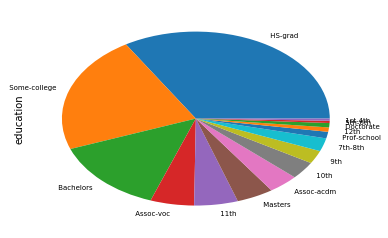

In [146]:
r2.plot(kind="pie", fontsize="7")


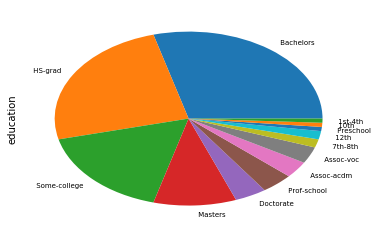

In [148]:
r3.plot(kind="pie", fontsize="7")

In [201]:
data.head()

,ID,age,workclass,fnlwgt,education,education_cat,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hour_per_week,native_country,income,income>50K,occup_catagory
0,9364,38,Private,197077,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,1.0,<=50K,0,0
1,25668,31,Private,101761,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,51,1.0,<=50K,0,0
2,13316,26,Private,152855,HS-grad,9,Never-married,Exec-managerial,Own-child,Other,Female,0,0,40,2.0,<=50K,0,2
3,28750,50,Self-emp-not-inc,99894,5th-6th,3,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Female,0,0,15,1.0,<=50K,0,0
4,30619,35,Private,412379,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,1.0,<=50K,0,0


In [219]:
d = data[data["marital_status"] == " Never-married"]
d.age.describe()

count    178.000000
mean      29.882022
std       10.678275
min       17.000000
25%       22.000000
50%       26.500000
75%       34.750000
max       67.000000
Name: age, dtype: float64